# Исследование надежности заемщиков

## **Краткое описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт
погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели *кредитного скоринга* — специальной системы, которая 
оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**

- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита

**Цель исследования**

Дать ответы на вопросы:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?
- Приведите возможные причины появления пропусков в исходных данных.
- Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Основной бизнес целью  заказчика является - **расчет целесообразности выдачи кредита на основании имеющихся данных анкетирования**

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# импортируем необходимые библиотеки используя конструкцию try-except
try:
    import pandas as pd # библиотека для работы с табличными данными
    import matplotlib.pyplot as plt # модуль для создания графиков и диаграмм
    import seaborn as sns # библиотека, построенная на основе Matplotlib для визуализации данных.
    import numpy as np # библиотека для научных вычислений
    import missingno as msno # модуль для визуализации отсутствующих значений 
except Exception as e:
    # выведем сообщение об ошибке, с указанием ошибки
    print("Ошибка при загрузке библиотеки missingno: pip install missingno!  ", e) 
    

In [2]:
# убираем назойливые предупреждения 'warnings', оставим на память, может пригодиться
#import warnings
#warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
# прочитаем csv-файл, используя конструкцию try-except для предотвращения возникновения ошибки при попытке чтения файла
try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [4]:
# выведем первые 20 строчек для ознакомления с содержанием датафрейма
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
# выведем информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Разберем пролученную информацию из краткого обзора датафрейма**

### **Категории данных**

Данные в предоставленном датфрейме имеют следующие категории:

|Наименование| Категория данных |
| --- | --- |
| children | Количественное значение |
| days_employed | Количественное значение |
| dob_years | Количественное значение |
| education | Категориальное значение | 
| education_id | Категориальное значение | 
| family_status | Категориальное значение |
| family_status_id | Категориальное значение |
| gender | Категориальное значение |
| income_type | Категориальное значение |
| debt | Категориальное значение (булево)| 
| total_income | Количественное значение |
| purpose | Категориальное значение |

### **Аномалии**

В данных обнаружены артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Например, отрицательное количество дней трудового стажа или количество дней трудового стажа превышающее срок жизни человека в столбце **days_employed**.

### **Дубликаты**

В данных обнаружены неявные дубликаты в столбце **education** - одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.

### **Пропуски и возможные причины их возниковения**

В двух столбцах есть пропущенные значения. Один из них — **days_employed** (общий трудовой стаж в днях), второй — **total_income** (ежемесячный доход).

In [6]:
# лишний код не добавляющий ценности проекту!
# для повышения качества визуализации сделаем стиль графиков seaborn основным
#sns.set()

In [7]:
# лишний код не добавляющий ценности проекту!
# посмотрим на количества пропусков с помощью столбчатой диаграммы
# в случае отстутствия необходимых библиотек загрузим изображение по прямой ссылке
#try:
#    msno.bar(data);
#except Exception as e:
#    print("Ошибка при загрузке библиотеки missingno: pip install missingno!  ", e)
#    from IPython.display import Image
#    display(Image(url='https://i.postimg.cc/6qvG8WNv/2024-04-27-14-26-30.png')) # отображаем изображение

In [8]:
# посмотрим на долю пропусков в столбцах
data.isna().mean().sort_values(ascending=False).round(3)

days_employed       0.101
total_income        0.101
children            0.000
dob_years           0.000
education           0.000
education_id        0.000
family_status       0.000
family_status_id    0.000
gender              0.000
income_type         0.000
debt                0.000
purpose             0.000
dtype: float64

*Количество пропусков по двум столбцам равно и составляет около 10 % от общего количества записей*

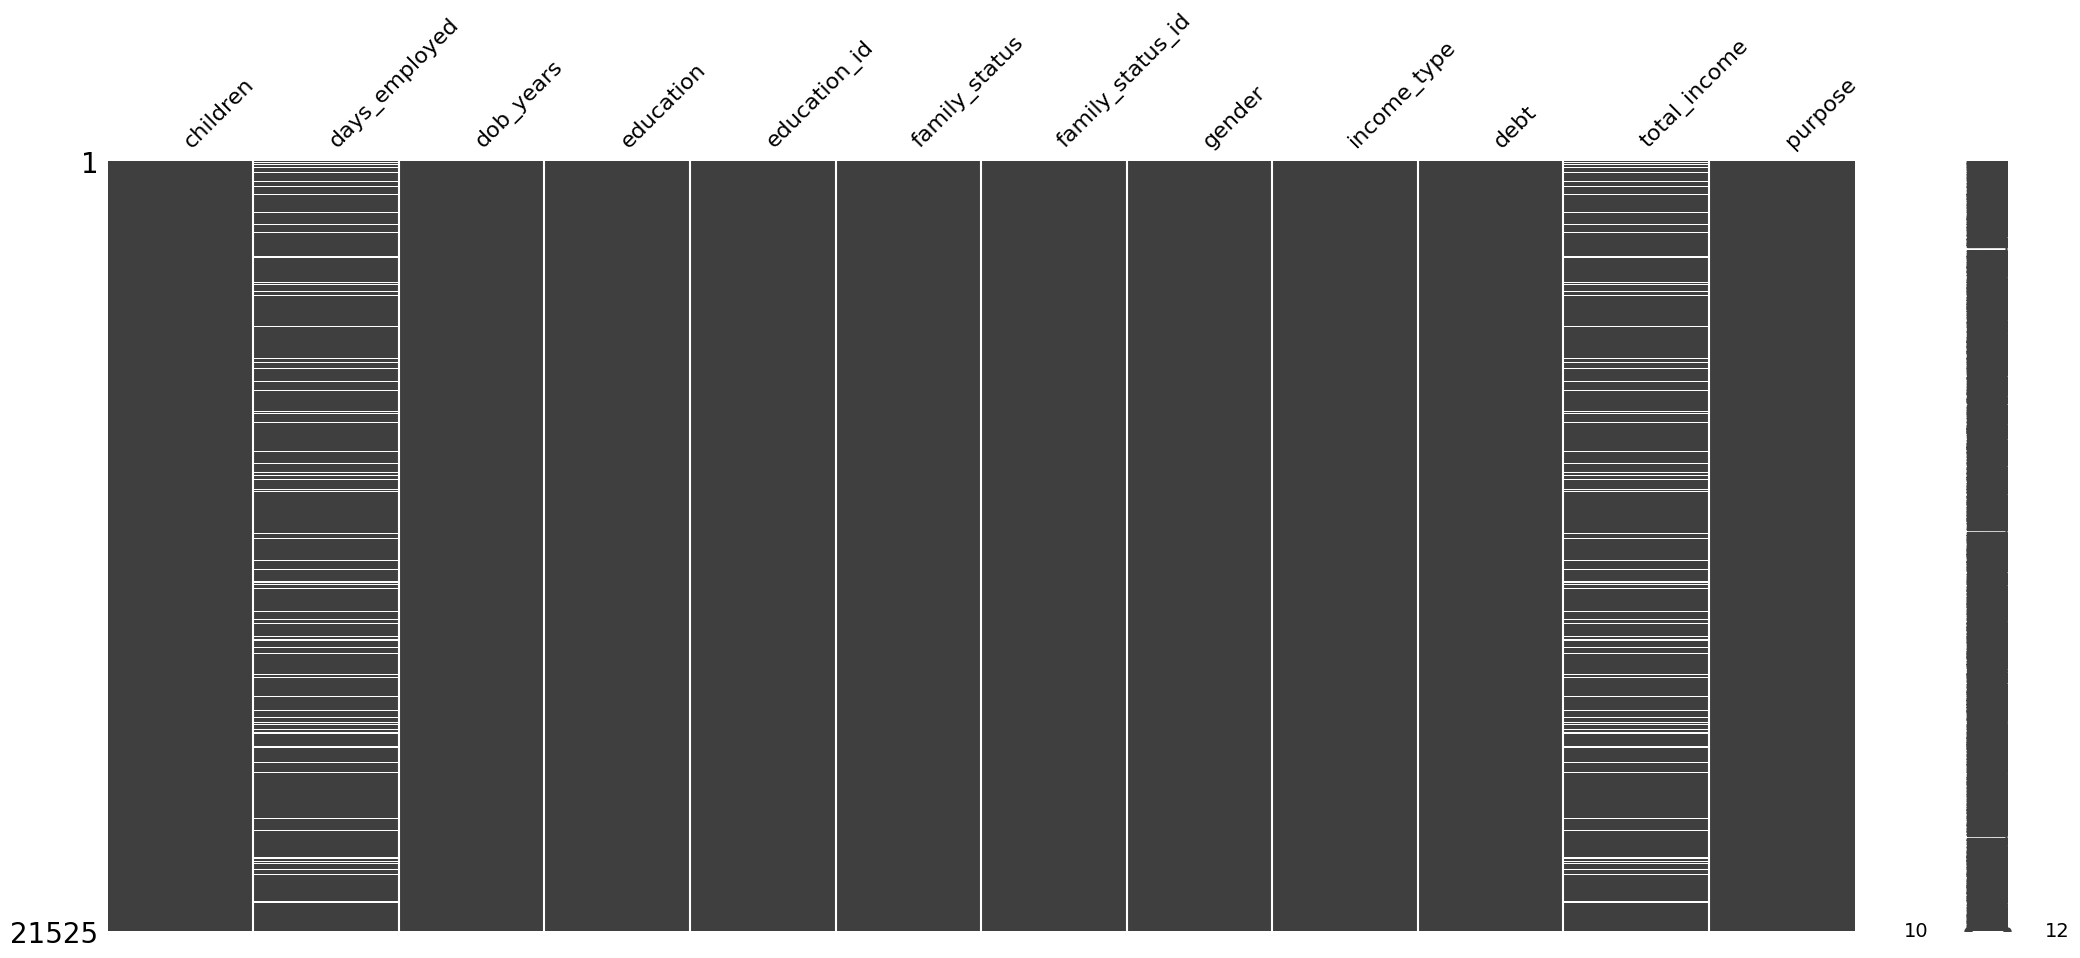

In [9]:
# для того что-бы определить существование в пропусках какой-то закономерности, построим матрицу пропущенных значений
# (функция msno.matrix()).
# в случае отстутствия необходимых библиотек загрузим изображение по прямой ссылке
try:
    msno.matrix(data)
except Exception as e:
    print("Ошибка при загрузке библиотеки missingno: pip install missingno!  ", e)
    from IPython.display import Image
    display(Image(url='https://i.postimg.cc/vmj8SDTx/2024-04-27-14-26-54.png'))

Из приведённой выше матрицы мы видим, что распределение пропущенных значений выглядит неслучайным, существует корреляция между пропущенными значениями в обоих столбцах и возможно существование зависимости от самого значения показателя.
Отнесём пропуски к **неслучайным** (*missing not at random, MNAR*)

**Возможной причиной  возниковения  пропусков в датасете - может являться желание респондента скрыть реальные доходы и стаж работы с целью увеличения шанса на одобрение кредита.**

Для заполнения пропусков в данном проекте мы будем использовать заполнение внутригрупповым  медианным значением, этот метод имеет ряд приемуществ:

- Медианное значение — это число, которое находится в середине числового ряда, если его упорядочить. Оно может помочь сохранить структуру данных, которая может исказиться при использовании других методов заполнения пропусков.

- Медианное значение устойчиво к экстремальным значениям (выбросам), что делает его надёжным методом заполнения пропусков в данных.

- Рассчитать медианное значение проще и быстрее, чем использовать более сложные методы анализа данных.

- В отличие от среднего арифметического, медианное значение не влияет на среднее значение в наборе данных, даже если в нём есть пропуски.

### **Целевая переменная**

Целевой переменной с которой мы будем работать для определения зависимостей является переменная 'debt' - имел ли клиент задолженность по возврату кредитов.

In [10]:
# определим количество клиентов имевших задолженность по возврату кредита
# data['debt'].value_counts(normalize=True)
data['debt'].mean().round(3)

0.081

*Общее количество клиентов имевших задолженность по возврату кредита составляет около 8% от общего количества записей.*

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [11]:
# применим методы .isna() и .sum() к датафрейму
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [12]:
# перебираем каждый тип занятости в наборе уникальных значений столба income_type
# на каждом шаге цикла с помощью атрибута loc выбираем строки,
# в которых в income_type текущий тип занятости (d) и есть пропуски в total_income
# и записываем в них среднее значение total_income среди строк с текущим типом занятости (d)# ваш код здесь
for d in data['income_type'].unique():
    data.loc[(data['income_type'] == d) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == d), 'total_income'].median()
# Выполним проверку наличия пропусков в столбце total_income после заполнения медианным значением
data.isna().sum()    

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [13]:
# применим метод .abs() для приведения отрицательных к абсолютным значениям
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [14]:
# выполним группировку по столбцу с типом занятости и значенями трудового стажа
data.groupby('income_type')['days_employed'].agg(['median', 'count'])

,median,count
income_type,,
безработный,366413.652744,2
в декрете,3296.759962,1
госслужащий,2689.368353,1312
компаньон,1547.382223,4577
пенсионер,365213.306266,3443
предприниматель,520.848083,1
сотрудник,1574.202821,10014
студент,578.751554,1


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [15]:
# применим метод .unique() для отображения перечня уникальных значений
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

*Обнаружены аномальные значения в столбце с количеством детей: -1, 20*

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [16]:
# лишний код не добавляющий ценности проекту!
# создадим переменную anomalies содержащую аномальные значения.
# для удаления строк перезапишем датафрейм с помощью применения метода .drop(удалит указанные в аргументе значения),
# метода .isin() которая используется в библиотеке pandas для проверки наличия значений в серии или в DataFrame.
#anomalies = [-1, 20]
#data = data.drop(data[data['children'].isin(anomalies)].index)

# всё можно было сделать гораздо проще! перезапишем наш датафрейм с учетом значения логических операторов,
# такой способ не требует создания дополнительной переменной.
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [17]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [18]:
# применим метод .unique() для отображения перечня уникальных значений в столбце с возрастом клиентов
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

*Обнаружены аномальные значения в столбце с возрастом клиентов равные 0.*

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [19]:
# перебирём каждый тип занятости в наборе уникальных значений столцба income_type
# на каждом шаге цикла с помощью атрибута loc выбираем строки,
# в которых в income_type текущий тип занятости (d) и есть пропуски в total_income
 # и записываем в них среднее значение total_income среди строк с текущим типом занятости (d)# ваш код здесь
for d in data['income_type'].unique():
    data.loc[(data['income_type'] == d) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == d), 'days_employed'].median()
 

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [20]:
# выполним проверку наличия пропусков в датафрейме
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### **Обработка аномальных значений (продолжение)**

В двух столбцах нашего датафрейма остались аномальные значения:
   - в столбце **days_employed** медианное значение трудового стажа для безработных и пенсионеров составляет более 365000 дней, что cоответсвует значению более 1000 лет;
   - в столбце **dob_years** присутствует значения возраста клиентов равное 0.

Мы не можем поступить с данными значениями по аналогии со столбцом **children**, так как удаление строк с аномальными значениями, окажет влияние на результат исследования поставленных вопросов.

Сами же аномальные значения в данных столбцах не оказывают прямого влияния на проверку интересующих нас гипотез, но могут иметь значение для построения модели кредитного скоринга, что является основной задачей заказчика (**расчет целесообразности выдачи кредита на основании имеющихся данных анкетирования**).

*Что можно сделать?* 

*Оба столбца имеют корреляцию друг с другом, чем больше возраст клиента тем вероятнее всего больше дней трудового стажа.
Попробуем заменить имеющиеся аномальные значения на среднегрупповые медианные.*

*Первым делом заменим значения равные нулю в столбце с возрастом клиентов*

In [21]:
# заменим значения на пропуски и проверим результат
data.loc[data['dob_years'] == 0, 'dob_years'] = np.nan
data['dob_years'].isna().sum()

100

In [22]:
# по аналогии с предыдущими столбцами используем цикл для замены пропусков
for d in data['income_type'].unique():
    data.loc[(data['income_type'] == d) & (data['dob_years'].isna()), 'dob_years'] = \
    data.loc[(data['income_type'] == d), 'dob_years'].median()
# проверим результат
data['dob_years'].unique()

array([42., 36., 33., 32., 53., 27., 43., 50., 35., 41., 40., 65., 54.,
       56., 26., 48., 24., 21., 57., 67., 28., 63., 62., 47., 34., 68.,
       25., 31., 30., 20., 49., 37., 45., 61., 64., 44., 52., 46., 23.,
       38., 39., 51., 60., 59., 29., 55., 58., 71., 22., 73., 66., 69.,
       19., 72., 70., 74., 75.])

*Мы заменили аномальные значения в столбце значения **dob_years** на среднегрупповые по типу занятости, теперь можем занятся столбцом **days_employed**, средние значения будем брать из возрастных категорий, для этого добавим столбец **age_group** в котором разделим клиентов по возрасту*

In [23]:
# с помощью метода .cut добавим столбец в котором разделим клиентов на возрастные группы
data['age_group'] = pd.cut(

    data['dob_years'], # наименование столбца

    bins=[0, 18, 30, 40, 50, 60, 2000], # границы возрастных групп

    labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'] # названия возрастных групп
)

*Определим какие значения стоит считать аномальными.*

In [24]:
# применение метода .unique не позволяет увидеть полную картину, ввиду большого количества значений
data['days_employed'].unique()

array([8437.67302776, 4024.80375385, 5623.42261023, ..., 2113.3468877 ,
       3112.4817052 , 1984.50758853])

*Предположим что все значения выше 18000 ~ 50 лет трудового стажа можно считать аномальными.*

In [25]:
# для проверки с помощью метода .cut добавим столбец в котором разделим на две категории : нормальные и аномальные значения
data['days_employed_group'] = pd.cut(

    data['days_employed'],

   bins=[0, 19000, 2000000], # границы возрастных групп
    labels=['normal',  'anomaly'] # названия возрастных групп
)
# отобразим  аномальные значения с сортировкой чтобы убедится в том, что в список попали только аномальные значения
#data.loc[data['days_employed_group'] == 'anomaly'].sort_values('days_employed').head()
# в список попало значение  18388 >50 лет трудового стажа, старт карьеры в 11 лет, 
# допустим и изменим значение границы на 19000
# отобразим количество и долю аномальных значений в столбце days_employed
data['days_employed_group'].value_counts(normalize=True).reset_index()

,index,days_employed_group
0,normal,0.820531
1,anomaly,0.179469


*Количество аномальных значений составляет около 18% процентов от общего*

In [26]:
# заменим значения на пропуски и проверим результат
data.loc[data['days_employed'] > 19000, 'days_employed'] = np.nan
data['days_employed'].isna().sum()

3841

In [27]:
# по аналогии с предыдущими столбцами используем цикл для замены пропусков и проверим результат
for d in data['age_group'].unique():
    data.loc[(data['age_group'] == d) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['age_group'] == d), 'days_employed'].median()
# сформируем сводную таблицу методом .groupby
data.groupby('age_group')['days_employed'].agg(['count','median'])

,count,median
age_group,,
<18,0,NaN
18-30,3705,1177.801697
30-40,5784,1572.328285
40-50,5241,1828.799871
50-60,4540,1968.453705
60+,2132,2285.039430


Мы внесли изменения в значения столбцов **days_employed** и **dob_years**

Внесённые нами изменения в значения датафрейма безусловно искажают реальные данные, но есть и ряд приемуществ:
- они не влияют на решение поставленных вопросов; 
- применения метод замены на среднегрупповое значение мы сохраняем структуру данных, что позволяет оценить влияние этих переменных на целувую *debt*, для построения модели кредитного скоринга.

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [28]:
# применим метод .astype(), который позволяет преобразовать значения в столбцах датафрейма к определённому типу данных.
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [29]:
# применим метод .str.lower() для преобразования всех символов строки в нижний регистр.
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [30]:
# посчитаем количество явных дубликатов 
data.duplicated().sum()

71

In [31]:
# удалим дубликаты с применением метода .drop_duplicates()
data = data.drop_duplicates()

### Категоризация данных

#### Категоризация по размерам доходов.

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [32]:
# создадим функцию categorize_income() с применением логических условий и применением конструкции try-except 
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income  <= 50000:
            return 'D'
        elif 50001 <= income  <= 200000:
            return 'C'
        elif 200001 <= income  <= 1000000:
            return 'B'
        elif income >= 1000001: 
            return 'A'
    except:
        return "Error"

In [33]:
# применим функцию методом apply() и отобразим результат
data['total_income_category'] = data['total_income'].apply(categorize_income)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,days_employed_group,total_income_category
0,1,8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,40-50,normal,B
1,1,4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,30-40,normal,C
2,0,5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,30-40,normal,C
3,3,4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,30-40,normal,B
4,0,1968.453705,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,50-60,anomaly,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,40-50,normal,B
21521,0,2285.039430,67.0,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,60+,anomaly,C
21522,1,2113.346888,38.0,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,30-40,normal,C
21523,3,3112.481705,38.0,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,30-40,normal,B


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [34]:
# применим метод .unique() для отображения уникальных значений
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

#### Категоризация по цели кредита.

**Для категоризации клиентов по цели кредита, необходимо учесть наличие неявных дубликатов в столбце с целью кредита.**

**Внесение всех вариантов в тело функции будет слишком длительным и громостким решением.**

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [35]:
# создадим функцию categorize_purpose() с применением конструкции try-except которая пройдется по каждому элементу столбца 
# purpose и проверит наличие строк в его значениях.
def categorize_purpose(purpose):
    try:
        if 'авто' in purpose: 
            return 'операции с автомобилем'
        elif 'свадьб' in purpose: 
            return 'проведение свадьбы'
        elif 'образован' in purpose: 
            return 'получение образования'
        elif 'жиль' in purpose or 'недвижим' in purpose:
            return 'операция с недвижимостью'
    except:
        return 'операция не определена'
        

In [36]:
# применим функцию методом map() и отобразим получившуюся таблицу
data['purpose_category'] = data['purpose'].map(categorize_purpose)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,days_employed_group,total_income_category,purpose_category
0,1,8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,40-50,normal,B,операция с недвижимостью
1,1,4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,30-40,normal,C,операции с автомобилем
2,0,5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,30-40,normal,C,операция с недвижимостью
3,3,4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,30-40,normal,B,получение образования
4,0,1968.453705,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,50-60,anomaly,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,40-50,normal,B,операция с недвижимостью
21521,0,2285.039430,67.0,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,60+,anomaly,C,операции с автомобилем
21522,1,2113.346888,38.0,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,30-40,normal,C,операция с недвижимостью
21523,3,3112.481705,38.0,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,30-40,normal,B,операции с автомобилем


##  Исследуйте данные и ответьте на вопросы

###  **Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Так как категории в столбце children_group основаны на количественных значения, мы можем напрямую сравнить как изменяется доля должников в зависимости от увеличения количества детей, сортировка таблицы для анализа в данном случае не требуется.


In [37]:
# эволюция решений! 
# cгруппировали данные по столбцу с количеством детей
#data_group_children = data.groupby('children').agg({'debt':'sum'}) # создали переменную, сгруппировали и применили метод .agg()
#data_group_children['total_count'] = data['children'].value_counts() # добавили столбец с применением метода .value_counts()
#data_group_children['rate'] = data_group_children['debt'] / data_group_children['total_count'] # определили долю от общего количества
#data_group_children # отобразили результат

In [38]:
# сделаем всё то же самое методом построения сводных таблиц .pivot_table
children_relation = data.pivot_table(index='children', 
                     columns=None,
                     values='debt',
                     aggfunc=['count', 'sum', 'mean'],
).round(3)
children_relation.columns = ['total', 'debtors', 'rate'] # переименуем названия столбцов для наглядности
children_relation # отобразим  результат
 

,total,debtors,rate
children,,,
0,14091,1063,0.075
1,4808,444,0.092
2,2052,194,0.095
3,330,27,0.082
4,41,4,0.098
5,9,0,0.000


Обратим внимание, что группы с  3 и более детьми очень малочисленные, с целью снижения влияния выбросов и исключения ошибок при формулировании статистических выводов объединим этих клиентов в одну группу

In [39]:
#объединение методом .cut()
data['children_group'] = pd.cut(

    data['children'],

    bins=[-1, 0, 1, 2, 20], # границы 

    labels=['0', '1', '2', '3+'] # названия 
)
data['children_group'].value_counts()

0     14091
1      4808
2      2052
3+      380
Name: children_group, dtype: int64

,count,sum,mean
children_group,,,
0,14091,1063,0.075
1,4808,444,0.092
2,2052,194,0.095
3+,380,31,0.082


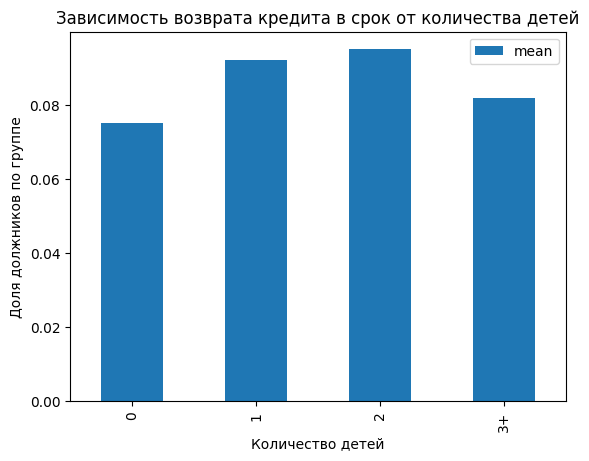

In [40]:
# сформируем сводную таблицу по столбцу children_group методом .groupby 
display(data.groupby('children_group')['debt'].agg(['count', 'sum', 'mean']).round(3))
# отобразим столбчатую диаграмму
data.groupby('children_group')['debt'].agg(['mean']).round(3).plot(kind='bar')
plt.title('Зависимость возврата кредита в срок от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Доля должников по группе')
plt.show()

**Напишем функцию, которая выполнит создание сводной таблицы и построение столбчатой диаграммы автоматически для каждой интересующей нас категории.**


,total_counts,debt_counts,debt_rate
children_group,,,
0,14091,1063,0.075
1,4808,444,0.092
2,2052,194,0.095
3+,380,31,0.082


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


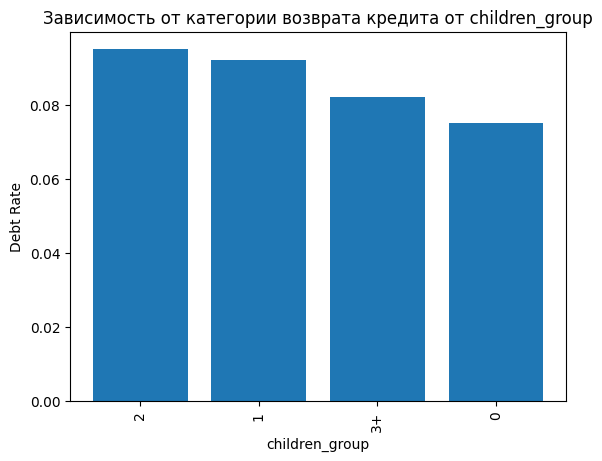

In [41]:
# Напишем функцию, которая выполнит создание сводной таблицы и построение столбчатой диаграммы автоматически для каждой интересующей нас категории
def pivotfunc(data, index):
    p = data.pivot_table(index = index, columns = None, values='debt', aggfunc=(['count', 'sum', 'mean'])).round(3).droplevel(0, axis=1)
    p.columns = ['total_counts', 'debt_counts', 'debt_rate']
    display(p)

    # Сортируем данные в диаграмме по среднему значению
    sorted_p = p.sort_values(by='debt_rate', ascending=False)

    # Добавляем код для построения диаграммы
    fig, ax = plt.subplots()
    ax.bar(sorted_p.index, sorted_p['debt_rate'])
    ax.set_xticklabels(sorted_p.index, rotation=90)
    ax.set_title('Зависимость от категории возврата кредита от '+index)
    ax.set_xlabel(index)
    ax.set_ylabel('Debt Rate')

    # Отображаем диаграмму
    plt.show()
    
pivotfunc(data, 'children_group')

#### **Выводы**


Из представленных данных сложно сделать однозначный вывод о наличии или отсутствии зависимости между количеством детей и возвратом кредита в срок,но можно сформировать следующие выводы:

- Группа 0 (клиенты без детей) имеет самое большое количество клиентов 14091 и наименьшую долю клиентов с задолженностью - 7.5%.
- В представленной выборке клиентов без детей в 3 раза больше чем клиентов с одним ребёнком и в 7 раз больше чем с двумя детьми.
- По мере увеличения количества детей растёт и доля клиентов, имеющих задолженность. Это может говорить о том, что наличие детей может влиять на способность клиентов выплачивать кредиты в срок.
- Можно предположить, что семьи с большим количеством детей могут испытывать больше финансовых трудностей и иметь более высокий уровень задолженности. Однако это лишь предположение, которое требует дополнительного исследования.
- Необходимо провести более детальный анализ данных и учесть все возможные факторы, которые могут влиять на финансовое поведение клиентов.

**Таким образом можно предположить, что количество детей у клиента может оказывать влияние на их способность возвращать кредиты в срок, но для окончательного подтверждения этой зависимости требуется дальнейший анализ, так как разница на самом деле может оказаться в рамках статистической погрешности **


### **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Значение переменной **family_status** является категориальным, мы не можем напрямую сравнить два показателя, поэтому отсортируем сводную таблицу по среднему значению целевой переменной **debt** для формирования рейтинга.

In [42]:
# сформируем сводную таблицу по столбцу family_status и отсортируем по убыванию
#display(data.groupby('family_status')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean', ascending=False))
# отобразим столбчатую диаграмму
#data.groupby('family_status')['debt'].agg(['mean']).round(3).sort_values('mean', ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от семейного положения')
#plt.xlabel('Семейное положение')
#plt.ylabel('Доля должников по группе')
#plt.show()

,total_counts,debt_counts,debt_rate
family_status,,,
Не женат / не замужем,2796,273,0.098
в разводе,1189,84,0.071
вдовец / вдова,951,63,0.066
гражданский брак,4134,385,0.093
женат / замужем,12261,927,0.076


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


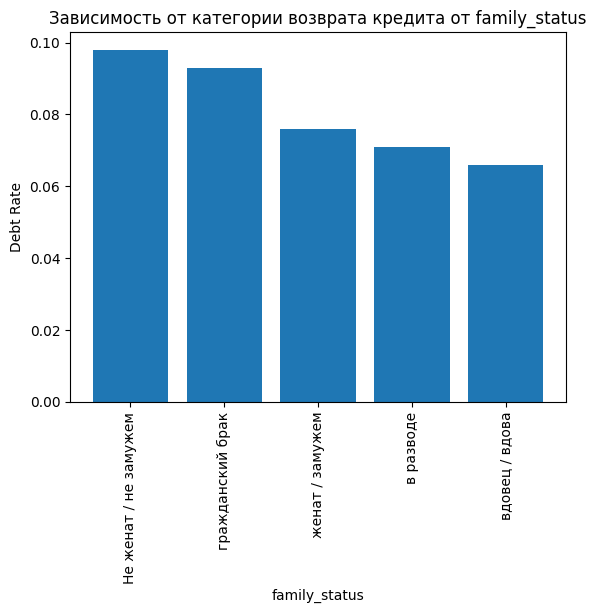

In [43]:
pivotfunc(data, 'family_status')

#### **Выводы** 

Количество записей в каждой группе позволяет сделать выводы без каких либо изменений в структуре данных.

Из представленных данных можно сделать следующие выводы:
- Кредит чаще берут женатые \ замужние люди (или же им чаще его одобряют);
- Диаграмма выще представляет собой антирейтинг клиентов от худшего к лучшему;
- Можно предположить, что брак может способствовать более ответственному отношению к финансам и возврату кредитов, в то время как люди, не состоящие в браке или находящиеся в гражданском браке, могут иметь более нестабильные финансовые обстоятельства или меньшую финансовую поддержку от партнера.;
- Возможно большее количество просрочек по кредиту у людей живущих в гражданском браке связано с пренебрежением государственными институтами и меньшей юридической грамотностью.


**Таким образом, можно предположить, что семейное положение может оказывать влияние на возврат кредита в срок, и клиенты, находящиеся в более устойчивых семейных отношениях, имеют более низкую вероятность задолженности. Для окончательного подтверждения этой зависимости требуется дальнейший анализ.**



### **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Так как значение переменной **total_income_category** является количественным, мы можем напрямую сравнить как изменяется доля должников в зависимости от уровня дохода, сортировка таблицы для анализа в данном случае не требуется.

In [44]:
# сформируем сводную таблицу по столбцу total_income_category и отсортируем по убыванию
#display(data.groupby('total_income_category')['debt'].agg(['count', 'sum', 'mean']).round(3))
# отобразим столбчатую диаграмму
#data.groupby('total_income_category')['debt'].agg(['mean']).round(3).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от уровня дохода')
#plt.xlabel('Уровень дохода')
#plt.ylabel('Доля должников по группе')
#plt.show()

,total_counts,debt_counts,debt_rate
total_income_category,,,
A,25,2,0.080
B,5014,354,0.071
C,15921,1353,0.085
D,349,21,0.060
E,22,2,0.091


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


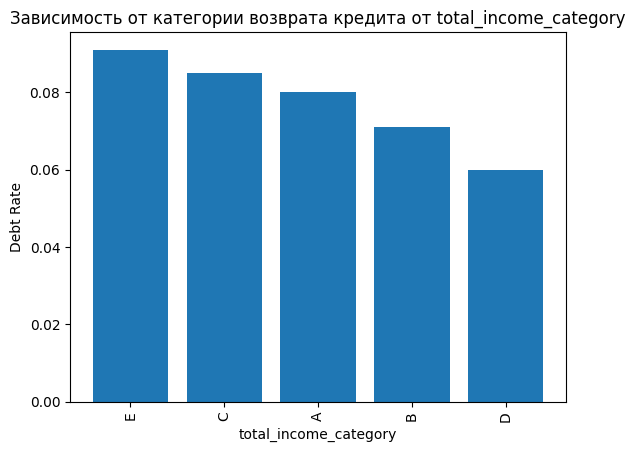

In [45]:
pivotfunc(data, 'total_income_category')

Обратим внимание, что группы А и Е очень малочисленные, с целью снижения влияния выбросов и исключения ошибок при формулировании статистических выводов мы можем:
- объеденить с ближайшими по значению группами;
- отбросить эти значения как выбросы.

*Гипотеза - оба варианта не изменят структуры оставшихся значений.*

,total_counts,debt_counts,debt_rate
total_income_group,,,
D,371,23,0.062
C,15921,1353,0.085
B,5039,356,0.071


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


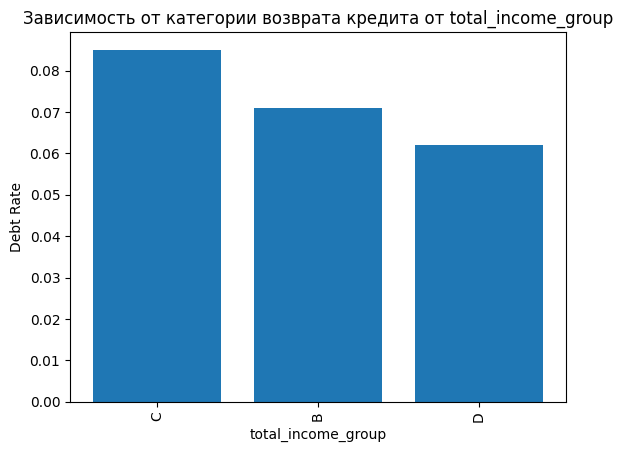

In [46]:
#объединеним значения методом .cut()
data['total_income_group'] = pd.cut(

    data['total_income'],

    bins=[0, 50001, 200000, 1000000000], # границы 

    labels=['D', 'C', 'B'] # названия 
)
# сформируем сводную таблицу по столбцу total_income_group и отсортируем по убыванию
#display(data.groupby('total_income_group')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))
# отобразим столбчатую диаграмму
#data.groupby('total_income_group')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от уровня дохода')
#plt.xlabel('Уровень дохода')
#plt.ylabel('Доля должников по группе')
#plt.show()

pivotfunc(data, 'total_income_group')

,total_counts,debt_counts,debt_rate
total_income_category,,,
B,5014,354,0.071
C,15921,1353,0.085
D,349,21,0.060


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


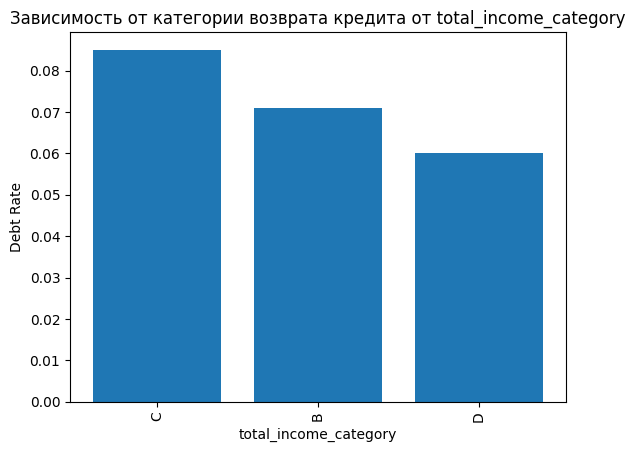

In [47]:
# отбросим значения  А и Е, для этого используем метод .isin()
# создадим отфильтрованный датафрейм
data_filtered = data[data['total_income_category'].isin(['B', 'C', 'D'])]
# сформируем сводную таблицу по столбцу total_income_category и отсортируем по убыванию
#display(data_filtered.groupby('total_income_category')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))
# отобразим столбчатую диаграмму
#data_filtered.groupby('total_income_category')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от уровня дохода')
#plt.xlabel('Уровень дохода')
#plt.ylabel('Доля должников по группе')
#plt.show()
pivotfunc(data_filtered, 'total_income_category')

*Гипотеза подтверждена, структура данных вне зависимости от метода не изменилась мы можем приступить к выводам.*

#### **Выводы**

Из представленных данных можно сделать следующие выводы:
- Клиенты с низким уровнем дохода и имеют наименьший процент задолженностей 6.2%, что может быть связано с более осторожным подходом к управлению финансами или с тем, что им предоставляются кредиты, соответствующие их доходам, или им воообще реже предоставляю кредиты.
- Клиенты со средним доходом имеют процент задолженностей 8.5% , это может указывать на то, что эта группа клиентов представляет собой наиболее многочисленную категорию среди представленных, и их финансовая стабильность может варьироваться.
- Клиенты с высоким уровнем дохода, более чем в три раза реже берут кредит чем клиенты со средним уровнем дохода, и имеют  процент задолженностей 7.1 % , что может объясняться как высокими доходами, так и большей финансовой грамотностью.

**Таким образом, на основе представленных данных можно сделать вывод о том, что существует зависимость между уровнем дохода и возвратом кредита в срок. Клиенты с более высоким уровнем дохода имеют обычно меньший процент задолженностей, чем со средним.**

**Можно ли утверждать что кредитный рейтинг людей с низким уровнем дохода выше чем у людей со средним? Сомневаюсь.**

### **Как разные цели кредита влияют на его возврат в срок?**

Значение переменной **purpose_category** является категориальным, мы не можем напрямую сравнить два показателя, поэтому отсортируем сводную таблицу по среднему значению целевой переменной **debt** для формирования рейтинга.

,total_counts,debt_counts,debt_rate
total_income_group,,,
D,371,23,0.062
C,15921,1353,0.085
B,5039,356,0.071


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


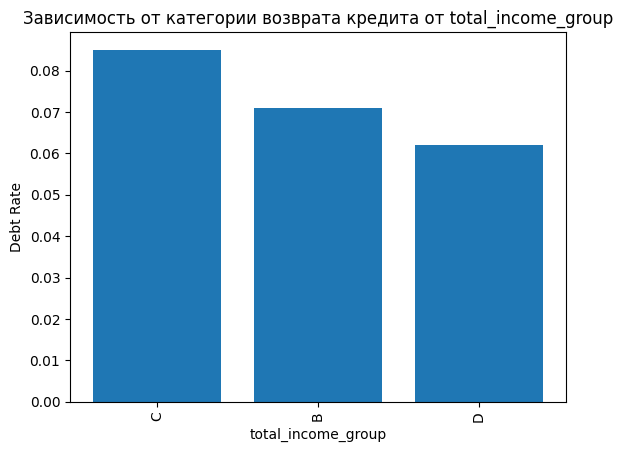

In [48]:
# сформируем сводную таблицу по столбцу 'purpose_category' и отсортируем по убыванию
#display(data.groupby('purpose_category')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))
# отобразим столбчатую диаграмму
#data.groupby('purpose_category')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от цели кредита')
#plt.xlabel('Цель кредита')
#plt.ylabel('Доля должников по группе')
#plt.show()
pivotfunc(data, 'total_income_group')

*Можно предположить что большее количество просрочек у клиентов  берущих кредит на получение образование связано с возрастом?* 

*Проверим гипотезу создав сводную таблицу.*

In [49]:
# сформируем сводную таблицу с применением метода pivot_table(), она приобретает среднее значение по умолчанию
purpose_age_group = data.pivot_table(index ='purpose_category',
                                     columns='age_group',
                                     values='debt'
).round(3)
# отсортируем по столбцу с наименьшим возрастом
purpose_age_group= purpose_age_group.sort_values('18-30', ascending=False)
# выведем на экран
purpose_age_group

age_group,18-30,30-40,40-50,50-60,60+
purpose_category,,,,,
получение образования,0.130,0.106,0.087,0.072,0.050
операции с автомобилем,0.123,0.117,0.085,0.068,0.057
операция с недвижимостью,0.098,0.083,0.068,0.055,0.043
проведение свадьбы,0.097,0.089,0.081,0.065,0.044


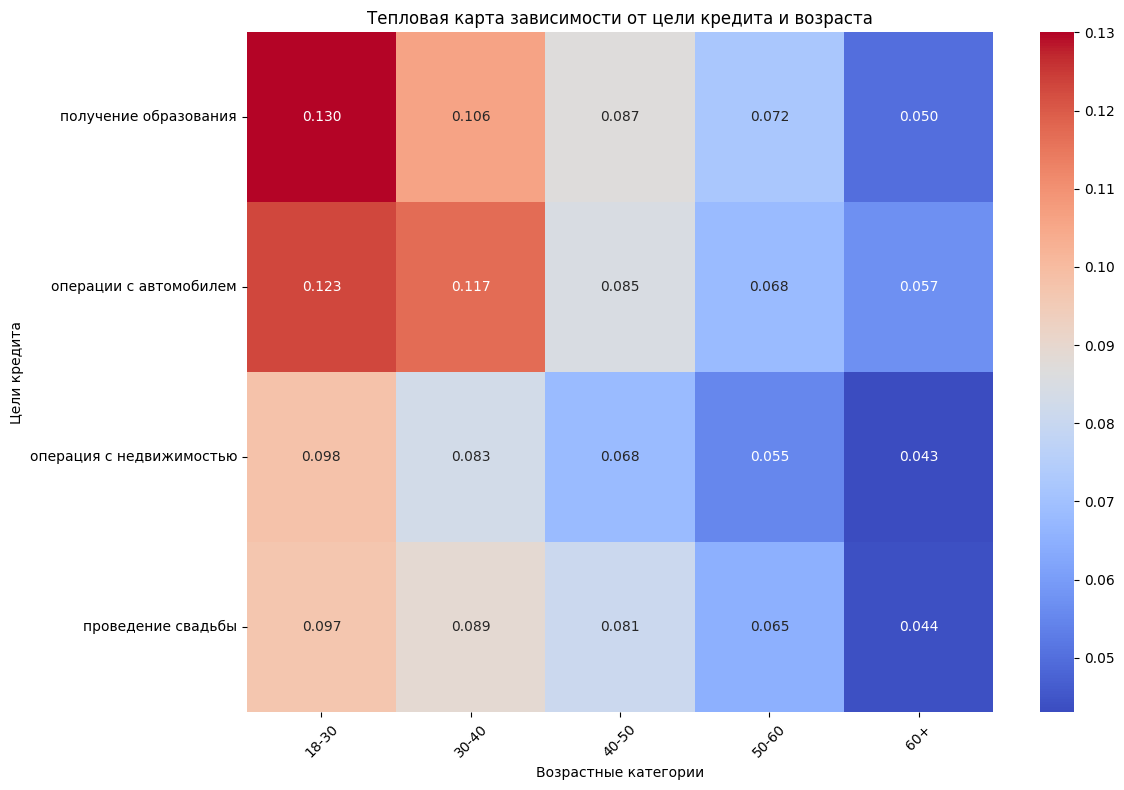

In [50]:
# для наглядности построим тепловую карту зависимостей
plt.figure(figsize=(12, 8))
sns.heatmap(purpose_age_group , annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Тепловая карта зависимости от цели кредита и возраста')
plt.xlabel('Возрастные категории')
plt.ylabel('Цели кредита')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

На получившейся тепловой карте мы можем наглядно увидеть как распределяются доли должников в различных возрастных группах по цели кредита, мы видим что  клиенты берущие кредит на получение образования или покупку автомобиля имеют самый высокий процент задолженностей от 10 до 13 %!


*Доля должников среди клиентов в целом идет на уменьшение с увеличением возраста, поэтому можно считать что гипотеза не подверждена, так как влияние в данном случае оказывает именно цель получения кредита.*

#### **Выводы** 

Количество записей в каждой группе позволяет сделать выводы без каких либо изменений в структуре данных.


Из предоставленных данных можно сделать следующие выводы:

- Клиенты чаще  берут кредит на операции с недвижимостью, такие операции имеют наименьший процент задолженностей - 7.3 % Это может быть связано с тем, что приобретение недвижимости часто связано с более крупными и долгосрочными финансовыми планами, что способствует более ответственному подходу к управлению кредитами.
- Отсортированная столбчатая диаграмма выше представляет собой антирейтинг клиентов от худшего к лучшему;
- Клиенты, берущие кредит на проведение свадьбы, имеют немного ниже процент задолженностей - 7.9%, по сравнению с клиентами, берущими кредит на операции с автомобилем или получение образования. Это может быть связано с тем, что свадьба, как правило, планируется заранее, что позволяет лучше оценить финансовые возможности и подготовиться к погашению кредита.
- Большее количество долгов по кредиту среди клиентов берущих кредит на операцию с автомобилем\получение образования  связано в первую очередь с целью, так как изменения по распределению должников наблюдаются во всех категориях в зависимости от возраста;

**Таким образом, можно сделать вывод, что цель кредита может влиять на возврат кредита в срок, причем клиенты, берущие кредит на операции с недвижимостью \ проведение свадьбы , обычно имеют наиболее меньший процент задолженностей, чем клиенты, берущие кредиты на автомобиль или образование.**

### **Приведите возможные причины появления пропусков в исходных данных.**

Продублируем информацию из раздела 2.4 "Пропуски и возможные причины их появления"

*Количество пропусков по двум столбцам было равным и составляло около 10 % от общего количества записей*

In [51]:
from IPython.display import Image
display(Image(url='https://i.postimg.cc/vmj8SDTx/2024-04-27-14-26-54.png'))

Из приведённой выше матрицы мы видим, что распределение пропущенных значений выглядит неслучайным, существует корреляция между пропущенными значениями в обоих столбцах и возможно существование зависимости от самого значения показателя.
Отнесём пропуски к **неслучайным** (*missing not at random, MNAR*)

Ответ: 
    
**Возможными причинами  возниковения  пропусков в датасете могут быть:** 
- желание респондента скрыть реальные доходы и стаж работы с целью увеличения шанса на одобрение кредита;
- ошибки при внесении данных;
- ошибки при анкетировании.

### **Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Ответ:

**Любое заполнение пропусков расчетными данными в той или иной степени искажает данные.**

**Для выполнения задачи по определению зависимостей между установленным целевым значением *debt* и другими переменными, главным кретерием является сохранение структуры для получения достоверной информации, точность данных в данном случае находится на втором плане.**

Для заполнения пропусков в данном проекте мы использовали заполнение внутригрупповым  медианным значением, этот метод имеет ряд приемуществ:

- Медианное значение — это число, которое находится в середине числового ряда, если его упорядочить. Оно может помочь сохранить структуру данных, которая может исказиться при использовании других методов заполнения пропусков.

- Медианное значение устойчиво к экстремальным значениям (выбросам), что делает его надёжным методом заполнения пропусков в данных.

- Рассчитать медианное значение проще и быстрее, чем использовать более сложные методы анализа данных.

- В отличие от среднего арифметического, медианное значение не влияет на среднее значение в наборе данных, даже если в нём есть пропуски.

**Таким образом, использование медианы для заполнения пропусков в количественных переменных обеспечивает баланс между сохранением структуры данных и минимизацией искажений.**

### **Проверка собственных гипотез**

#### **Есть ли зависимость между возрастом клиента и возвратом кредита в срок?**

Так как значение категориальное значение **age_group** основано на количественной переменной **dob_years**, мы можем напрямую сравнить как изменяется доля должников в зависимости от возраста, сортировка таблицы для анализа в данном случае не требуется.

In [62]:
data.pivot_table(index='children', 
                           #columns=None,
                            values='debt',
                            aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,debt,debt,debt
children,,,
0,14090,1063,0.075444
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


,total_counts,debt_counts,debt_rate
age_group,,,
<18,0,0,NaN
18-30,3699,403,0.109
30-40,5773,548,0.095
40-50,5225,400,0.077
50-60,4516,280,0.062
60+,2118,101,0.048


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


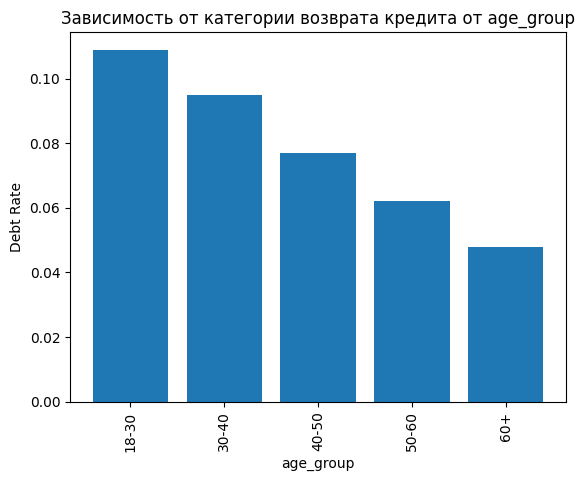

In [52]:
# сформируем сводную таблицу по столбцу total_income_category и отсортируем по убыванию
#display(data.groupby('age_group')['debt'].agg(['count', 'sum', 'mean']).round(3))
# отобразим столбчатую диаграмму
#data.groupby('age_group')['debt'].agg(['mean']).round(3).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от возраста клиента')
#plt.xlabel('Возрастная группа')
#plt.ylabel('Доля должников по группе')
#plt.show()
pivotfunc(data, 'age_group')

Количество записей в каждой группе позволяет сделать выводы без каких либо изменений в структуре данных.


Из представленных данных, мы можем сделать следующие выводы:

- Людям не выдают кредиты до 18 лет;
- **Доля клиентов, имеющих задолженность, постепенно уменьшается с увеличением возраста: от 10.9% для группы 18-30 до 4.8% для группы 60+.;**
- Можно предположить, что старшие возрастные группы, вероятно, обладают более стабильной финансовой ситуацией и более ответственным подходом к возврату кредитов, что приводит к уменьшению количества задолженностей.
- **Чем ниже возраст клиента, тем больше шанс просрочки и тем меньше вероятность одобрения кредита.**

**Таким образом, на основе представленных данных можно сделать вывод о наличии зависимости между возрастом клиентов и возвратом кредита в срок, с увеличением возраста клиентов наблюдается уменьшение вероятности задолженности.**

#### **Есть ли зависимость между стажем работы клиента и возвратом кредита в срок?**

Так как значение переменной **days_employed** является количественным, мы можем напрямую сравнить как изменяется доля должников в зависимости от возраста, сортировка таблицы для анализа в данном случае не требуется.

Для начала распределим на группы по значению трудового стажа.
Возьмем следующие значения:
- от нуля до года; 
- от года до трех лет; 
- от трех до пяти лет;
- от пяти до 10 лет;
- от 10 и выше.

,total_counts,debt_counts,debt_rate
days_employed_new,,,
от нуля до года,1817,193,0.106
от года до трех лет,3870,435,0.112
от трех до пяти лет,4509,380,0.084
от пяти до 10 лет,7961,558,0.070
10 лет и выше,3174,166,0.052


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


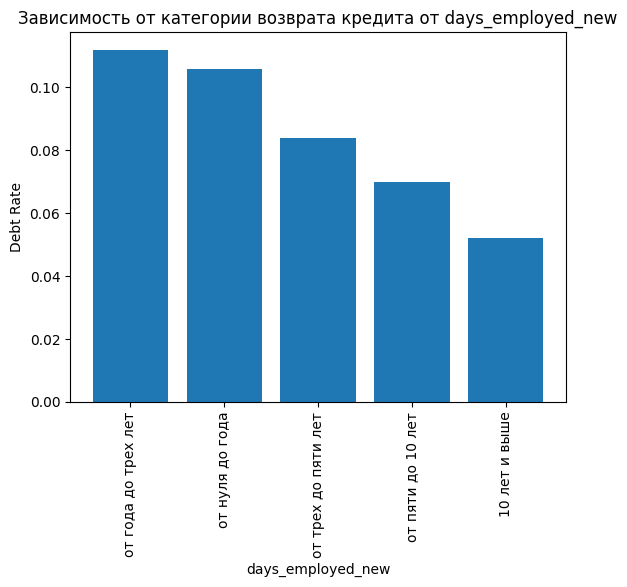

In [53]:
#объединеним значения методом .cut()
data['days_employed_new'] = pd.cut(

    data['days_employed'],

    bins=[0, 365, 1095, 1825, 3625, 19000], # границы 

    labels=['от нуля до года', 'от года до трех лет', 'от трех до пяти лет', 'от пяти до 10 лет', '10 лет и выше'] # названия 
)
# сформируем сводную таблицу по столбцу total_income_group и отсортируем по убыванию
#display(data.groupby('days_employed_new')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))
# отобразим столбчатую диаграмму
#data.groupby('days_employed_new')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от стажа работы')
#plt.xlabel('Стаж работы')
#plt.ylabel('Доля должников по группе')
#plt.show()

pivotfunc(data, 'days_employed_new')


Количество записей в каждой группе позволяет сделать выводы без каких либо изменений в структуре данных.

Данные были искажены при замене аномальных значений, но мы можем расчитывать на сохранение структуры для построения выводов.

Из представленных данных, можно сделать следующие выводы:
- Чаще всего берут кредиты люди со стажем работы от 5 до 10 лет;
- Эти же люди оказываются на втором месте кредитного рейтинга среди данных категорий, уступая лишь людям со стажем 10 и более лет;
- Среди клиентов со стажем 10 лет и выше, доля задолженностей по кредиту составляет на 5,2 %, что на 6% ниже чем у клиентов со стажем до года;
- Чем меньше стаж работы клиента тем больше вероятность просрочки и тем  меньше вероятность одобрения кредита. Это может быть связано с тем, что люди только начинающие свою карьеру могут иметь более нестабильный финансовую ситуацию и меньший опыт управления финансами.

**Таким образом, можно сделать вывод о наличии зависимости между длительностью трудового стажа и возвратом кредита в срок. Чем больше трудовой стаж у клиента, тем меньше вероятность задолженности по кредиту, вероятно из-за улучшения финансовой стабильности и опыта в управлении финансами.**


#### **Есть ли зависимость между полом клиента и возвратом кредита в срок?**

Значение переменной **gender** является категориальным, мы не можем напрямую сравнить два показателя, поэтому отсортируем сводную таблицу по среднему значению целевой переменной **debt** для формирования рейтинга.

In [54]:
# сформируем сводную таблицу по столбцу 'purpose_category' и отсортируем по убыванию
display(data.groupby('gender')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))

,count,sum,mean
gender,,,
M,7238,743,0.103
F,14092,989,0.070
XNA,1,0,0.000


,total_counts,debt_counts,debt_rate
gender,,,
F,14092,989,0.070
M,7238,743,0.103


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


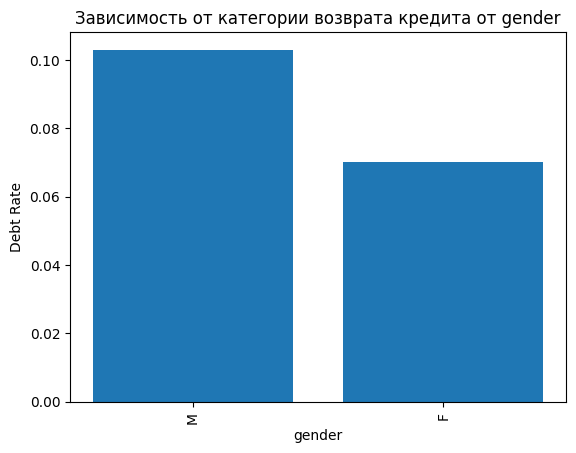

In [55]:
# отбросим значения из категории XNA , для этого используем метод .isin()
# создадим отфильтрованный датафрейм
data = data[(data['gender'] != 'XNA')]
# отобразим столбчатую диаграмму
#data.groupby('gender')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')
#plt.title('Зависимость возврата кредита в срок от пола клиента')
#plt.xlabel('Пол клиента')
#plt.ylabel('Доля должников по группе')
#plt.show()
pivotfunc(data, 'gender')

*Гипотеза -  на мужчин иногда сваливается содержание семьи. Проверим как влияет семейное положение  на мужчин и женщин а части возврата кредитов.*

In [56]:
# сформируем сводную таблицу с применением метода pivot_table(), она приобретает среднее значение по умолчанию
family_gender = data.pivot_table(index ='family_status',
                                     columns='gender',
                                     values='debt'
).round(3)
# отсортируем по столбцу с наименьшим возрастом
family_gender = family_gender.sort_values('M', ascending=False)
# выведем на экран
family_gender

gender,F,M
family_status,,
вдовец / вдова,0.058,0.200
Не женат / не замужем,0.068,0.144
гражданский брак,0.082,0.118
в разводе,0.066,0.089
женат / замужем,0.068,0.088


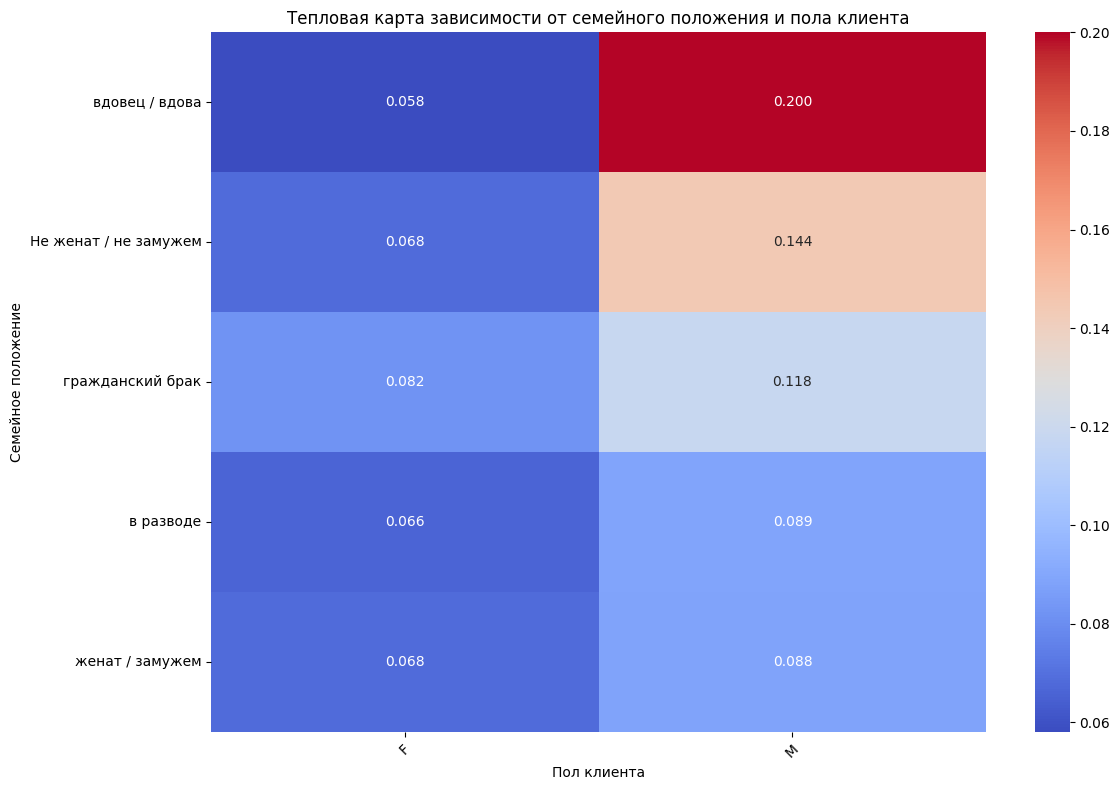

In [57]:
# для наглядности построим тепловую карту зависимостей
plt.figure(figsize=(12, 8))
sns.heatmap(family_gender , annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Тепловая карта зависимости от семейного положения и пола клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Семейное положение')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

На получившейся тепловой карте, мы можем наглядно увидеть как распределяются доли должников среди женщин и мужчин в зависимости от их семейного статуса:

- Клиенты-женщины в целом стабильны по выплате кредита вне зависимости от семейного положения, за исключением гражданского брака. Женщины-клиенты, которые находятся в гражданском браке, чаще оказываются среди должников — 8,2 %, а реже всего в должники попадают овдовевшие женщины — 5,8 %.

- Среди клиентов-мужчин вдовцов — 20 % — оказываются должниками, следом за ними идут неженатые клиенты — 14 % должников.

- Стабильнее всех в финансовом плане оказались женатые и разведённые мужчины, должников среди них лишь 8,8 %.

**Таким образом, можно сделать вывод, что содержание семьи влияет на финансовое положение мужчин скорее благотворно. Поэтому гипотезу о корреляции финансовых проблем мужского населения с нелегкой семейной долей можно считать опровергнутой! =)**

Количество записей в каждой группе позволяет сделать выводы без каких либо изменений в структуре данных.

Из представленных данных, можно сделать следующие выводы:
- Среди клиентов банка женщин в два раза больше чем мужчин!
- Клиенты мужского пола имеют более высокий процент задолженностей - 10.3%, чем клиенты женского пола, у которых этот процент составляет 7.0%.
- Это может указывать на то, что мужчины, возможно, чаще сталкиваются с финансовыми трудностями или менее ответственно относятся к возврату кредитов.
- В то же время, женщины, вероятно, имеют более надежный и стабильный подход к управлению финансами, что отражается в более низком проценте задолженностей.
- А еще женщины в целом имеют меньше вредных привычек, дольше живут, и более созидательны и рациональны, чем мужчины... Правда или ложь? =)

**Таким образом, на основе представленных данных можно сделать вывод о наличии зависимости между полом клиента и возвратом кредита в срок. Клиенты женского пола имеют меньший процент задолженностей по сравнению с клиентами мужского пола.**

#### **Есть ли зависимость между уровнем образования клиента и возвратом кредита в срок?**

Значение переменной **education** является категориальным, мы не можем напрямую сравнить два показателя, поэтому отсортируем сводную таблицу по среднему значению целевой переменной **debt** для формирования рейтинга.

,total_counts,debt_counts,debt_rate
education,,,
высшее,5227,278,0.053
начальное,282,31,0.110
неоконченное высшее,740,68,0.092
среднее,15075,1355,0.090
ученая степень,6,0,0.000


C:\Users\user\AppData\Local\Temp\ipykernel_7096\2124465265.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_p.index, rotation=90)


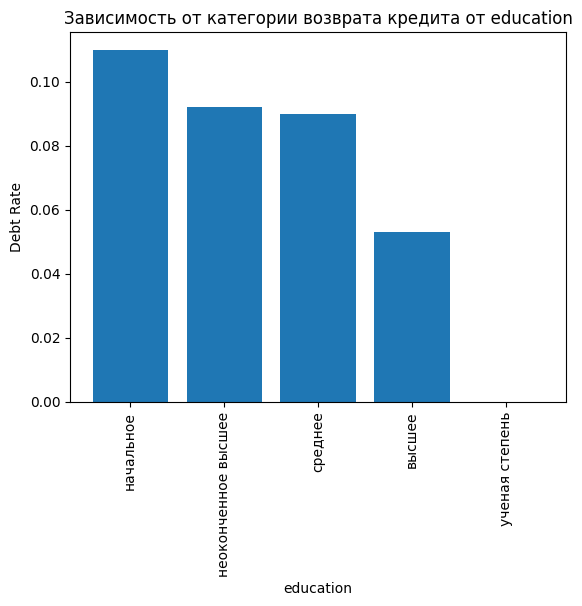

In [58]:
# сформируем сводную таблицу по столбцу 'purpose_category' и отсортируем по убыванию
#display(data.groupby('education')['debt'].agg(['count', 'sum', 'mean']).round(3).sort_values('mean',ascending=False))
# отобразим столбчатую диаграмму
#data.groupby('education')['debt'].agg(['mean']).round(3).sort_values('mean',ascending=False).plot(kind='bar')

pivotfunc(data, 'education')

Из представленных данных, можно сделать следующие выводы:
- Количество клиентов банка имеющих учёную степень крайне мало, для проведения хоть какого нибудь анализа;
- Среди клиентов банка в три раза больше имеющих среднее образование чем клиентов имеющих высшее и в 50 раз больше чем имеющих начальное!
- Клиенты с незаконченным высшим образованием имеют те же тенденции по возврату кредита в срок что и со средним их можно объединить
- Клиенты с высшим образованием имеют наименьший процент задолженностей - 5.3%. Это может указывать на то, что образование на более высоком уровне может способствовать более ответственному подходу к управлению финансами и более успешному возврату кредитов.
- Клиенты со средним и начальным образованием имеют более высокий процент задолженностей - 9.0% и 11.0%. Это может быть связано с менее стабильной финансовой ситуацией или меньшими возможностями для получения высокооплачиваемой работы.


**Таким образом, можно сделать вывод о зависимости между уровнем образования клиента и возвратом кредита в срок. Обычно клиенты с более высоким уровнем образования имеют более низкий процент задолженностей, в то время как клиенты с более низким уровнем образования имеют более высокий процент задолженностей.**

## **Общий вывод**

**Скоринговая модель** — алгоритм или методика, которая позволяет оценить вероятность невыполнения обязательств потенциального заёмщика. Она используется банками и микрофинансовыми организациями для принятия решения о выдаче кредита или займа.
Построение модели кредитного скоринга как правило подразумевает применение более сложных статистических методов таких как: регрессионный анализ, дискриминантный анализ, деревья решений и др.

**Ответы на поставленные вопросы, по отдельности, не позволяют сделать однозначный вывод о целесообразности выдачи кредита клиенту.** 

   Однако, благодаря проведенному нами предварительному анализу, мы  выяснили какие факторы могут влиять на возврат кредита в срок и сделали следующие выводы: 

- Наличие детей у клиента может повлиять на его способность вернуть кредит в срок, так как клиенты с детьми чаще имеют задолженности.
- Женатые/замужние клиенты обычно имеют более низкий процент задолженностей.
- Клиенты с более высоким уровнем дохода и клиенты, берущие кредит на операции с недвижимостью или свадьбу, чаще возвращают кредиты в срок.
- С возрастом клиентов наблюдается уменьшение вероятности задолженности.
- Клиенты с более длительным трудовым стажем и клиенты с более высоким уровнем образования также имеют меньшую вероятность задолженности.
- Женщины чаще возвращают кредиты в срок по сравнению с мужчинами.

**Исходя из этих выводов, мы рекомендуем банку улучшить свою модель кредитного скоринга, включив в неё дополнительные параметры, такие как семейное положение, цель кредита, а также учитывая возраст, трудовой стаж, пол и уровень образования заемщика. Это поможет более точно оценить кредитоспособность клиентов и снизить риски задолженности.**

**Для окончательного подтверждения этих зависимостей требуется дальнейший анализ, так как разница может наблюдаться в рамках статистической погрешности**

*За основу проекты был взят шаблон из учебной среды практикума, разделы с внесенными изменениями были **выделены**.*